In [1]:
import numpy as np

import matplotlib.pyplot as plt
from cobaya.yaml import yaml_load_file
from cobaya.model import get_model
%matplotlib inline


In [10]:
info_from_yaml = yaml_load_file("/home/fverdian/cobaya/FRA-params/AxiCLASS_withbr.yaml")
info_from_yaml['likelihood']['pbjboss']['python_path']='/home/fverdian/cobaya/pbj4cobaya/'
info_from_yaml['likelihood']['pbjboss']['pbj_path']='/home/fverdian/cobaya/pbj-multiz/'
info_from_yaml['likelihood']['pbjboss']['likelihood']['store_theorydict']=True
model_pbj = get_model(info_from_yaml)

[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
[classy] `classy` module loaded successfully from /home/fverdian/anaconda3/lib/python3.10/site-packages
[info] The linear power spectrum will be computed with cobaya
[info]  Using scale dependent f
Loading linear emulator...
[absl] Fingerprint not found. Saved model loading will continue.
[absl] Fingerprint not found. Saved model loading will continue.


/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to bre

Linear emulator loaded in memory.
[info] Infrared resummation: True, kind: EH
[info] Alcock-Paczynski distortions: True
[pbjboss] Observables: ['P0', 'P2', 'P4', 'Q0']
[pbjboss] Using model_varied_cosmology_analytic_marg_multiz_withchi as likelihood model function
Setting fx functions
[pbjboss] Analyzing boss at redshifts [0.38 0.38 0.61 0.61]
[pbjboss] Analytically marginalizing on ['bG3', 'c0', 'c2', 'aP', 'e0k2', 'e2k2']


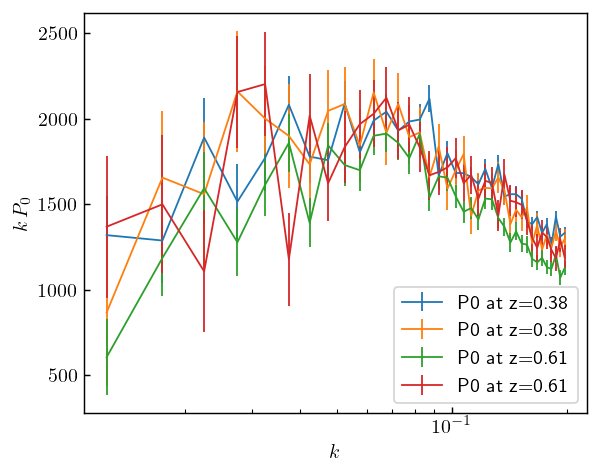

In [7]:
pbjObj = model_pbj.likelihood["pbjboss"].pbjobj
colors=['blue', 'green', 'y','m']
z_bins = pbjObj.z_bins
kCut = pbjObj.kPE[pbjObj.IdxP[0]]

%matplotlib inline
plt.figure(figsize=(5,4),dpi=130)
for i in range(len(z_bins)):
    var = np.diag(pbjObj.Cov[i][:len(kCut),:len(kCut)])
    # plt.loglog(kCut, pbjObj.CutDataVecs[i][0], label=f'P0 at z={z_bins[i]}')
    plt.errorbar(kCut, kCut*pbjObj.CutDataVecs[i][0], yerr=kCut*np.sqrt(var), label=f'P0 at z={z_bins[i]}', linewidth=1.)
plt.xscale('log')
plt.xlabel(r'$k$'),plt.ylabel(r'$k\, P_0$')
plt.legend()
plt.show()

Storing theorydict, althought it makes not much sense with analytical marginalization
Storing theorydict, althought it makes not much sense with analytical marginalization


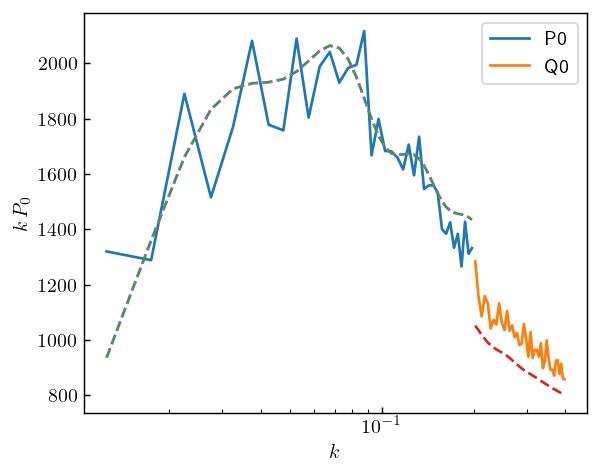

In [6]:
pbjObj = model_pbj.likelihood["pbjboss"].pbjobj
colors=['blue', 'green', 'y','m']
z_bins = pbjObj.z_bins
kCut = pbjObj.kPE[pbjObj.IdxP[0]]
kCutQ0 = pbjObj.kPE[pbjObj.IdxQ0[0]]

%matplotlib inline
plt.figure(figsize=(5,4),dpi=130)

plt.plot(kCut, kCut*pbjObj.CutDataVecs[0][0], label=f'P0')
plt.plot(kCutQ0,kCutQ0*pbjObj.CutDataVecs[0][3], label=f'Q0')


point_pbj = {'omega_scf': 0.0029134634, 'omega_cdm': 0.12324792, 'h': 0.69040812, 'omega_b': 0.022003847, 'logA': 2.7935083, 'b1_ngc_z1': 2.1762562, 'b1_sgc_z1': 2.2704711, 'b1_ngc_z3': 2.1473185, 'b1_sgc_z3': 2.4960227,'br_ngc_z1': 0, 'br_sgc_z1': 0, 'br_ngc_z3': 0, 'br_sgc_z3': 0}



logposterior = model_pbj.logposterior(point_pbj, as_dict=True, cached=False)
plt.plot(kCut,kCut*pbjObj.theorydict[0]['P0'], linestyle='--')

plt.plot(kCutQ0,kCutQ0*pbjObj.theorydict[0]['Q0'], linestyle='--')

point_pbj.update({'br_ngc_z1': 0, 'br_sgc_z1': 0, 'br_ngc_z3': 0, 'br_sgc_z3': 0,})
logposterior = model_pbj.logposterior(point_pbj, as_dict=True, cached=False)
plt.plot(kCut,kCut*pbjObj.theorydict[0]['P0'], linestyle=':')


plt.xscale('log')
plt.xlabel(r'$k$'),plt.ylabel(r'$k\, P_0$')
plt.legend()
plt.show()

Storing theorydict, althought it makes not much sense with analytical marginalization
Storing theorydict, althought it makes not much sense with analytical marginalization
Storing theorydict, althought it makes not much sense with analytical marginalization


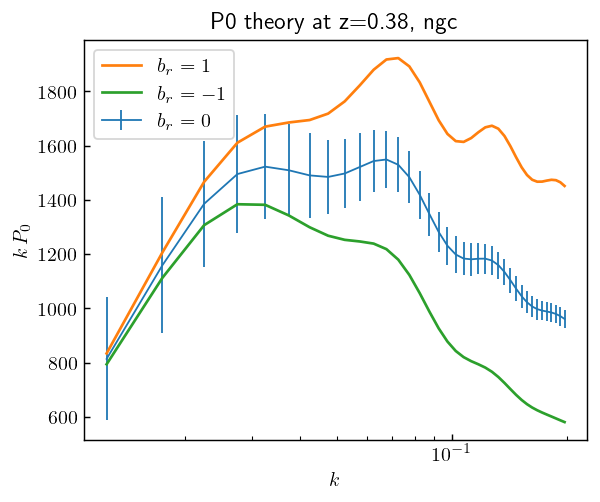

In [21]:
pbjObj = model_pbj.likelihood["pbjboss"].pbjobj
colors=['blue', 'green', 'y','m']
z_bins = pbjObj.z_bins
kCut = pbjObj.kPE[pbjObj.IdxP[0]]
kCutQ0 = pbjObj.kPE[pbjObj.IdxQ0[0]]

%matplotlib inline
plt.figure(figsize=(5,4),dpi=130)

point_pbj = {'omega_scf': 0.0039947537, 'omega_cdm': 0.11282061, 'h': 0.70268995, 'omega_b': 0.023155525, 'logA': 2.8592839,  'b1_ngc_z1': 1.8725208, 'b1_sgc_z1': 2.0470889, 'b1_ngc_z3': 1.9872064, 'b1_sgc_z3': 2.155942}

point_pbj.update({'br_ngc_z1': 0, 'br_sgc_z1': 0, 'br_ngc_z3': 0, 'br_sgc_z3': 0,})
logposterior = model_pbj.logposterior(point_pbj, as_dict=True, cached=False)
var = np.diag(pbjObj.Cov[0][:len(kCut),:len(kCut)])
plt.errorbar(kCut, kCut*pbjObj.theorydict[0]['P0'], yerr=kCut*np.sqrt(var), linewidth=1., label='$b_r=0$')


point_pbj.update({'br_ngc_z1': 1., 'br_sgc_z1': 1., 'br_ngc_z3': 1., 'br_sgc_z3': 1.})
logposterior = model_pbj.logposterior(point_pbj, as_dict=True, cached=False)
plt.plot(kCut,kCut*pbjObj.theorydict[0]['P0'], label='$b_r=1$')



point_pbj.update({'br_ngc_z1': -1, 'br_sgc_z1': -1, 'br_ngc_z3': -1, 'br_sgc_z3': -1,})
logposterior = model_pbj.logposterior(point_pbj, as_dict=True, cached=False)
plt.plot(kCut,kCut*pbjObj.theorydict[0]['P0'], label='$b_r=-1$')


plt.xscale('log')
plt.xlabel(r'$k$'),plt.ylabel(r'$k\, P_0$')
plt.legend()
plt.title('P0 theory at z=0.38, ngc')
plt.show()